In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv("C:\\Users\\Omkar\\Downloads\\sales_data_sample.csv", encoding="latin1")
print("Dataset loaded successfully")
print(df.head())

Dataset loaded successfully
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 r

In [3]:
num_df = df.select_dtypes(include=[np.number])

In [4]:
num_df = num_df.dropna()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

In [6]:
inertia = []
K = range(1, 11)

In [8]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

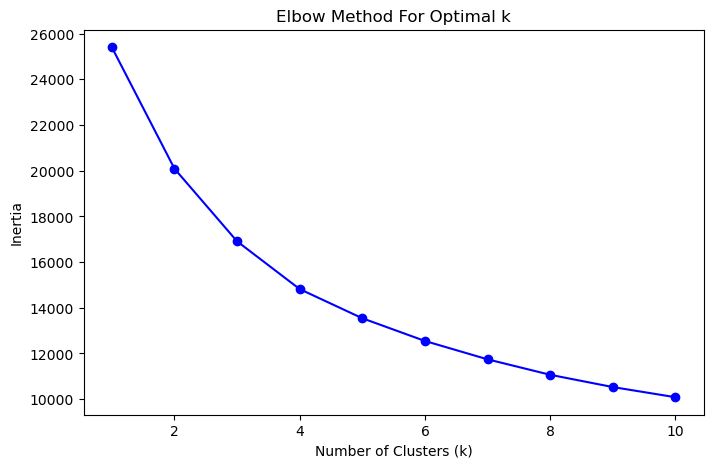

In [9]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [11]:
df['KMeans_Cluster'] = clusters
print("\nKMeans cluster counts:")
print(df['KMeans_Cluster'].value_counts())


KMeans cluster counts:
KMeans_Cluster
1    1183
2     906
0     734
Name: count, dtype: int64


In [12]:
linked = linkage(X_scaled, method='ward')

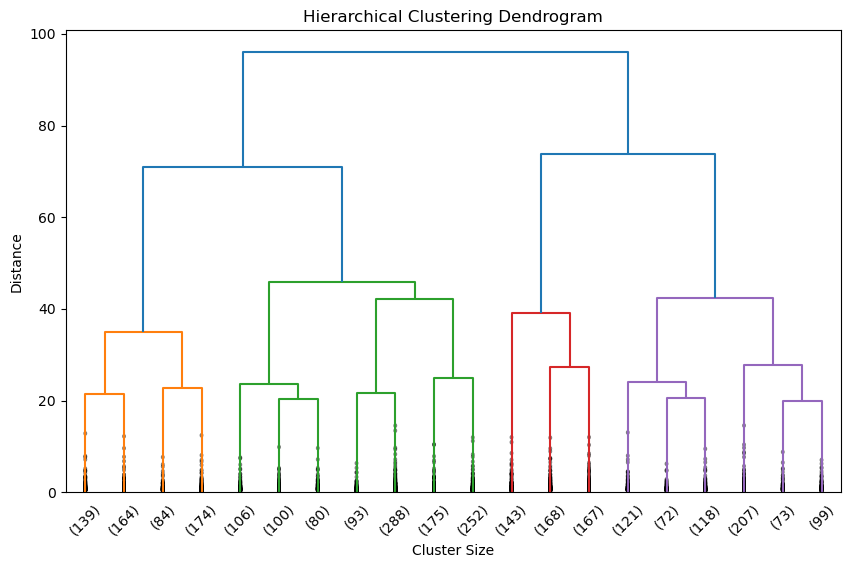

In [13]:
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20,
 leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [14]:
hc_clusters = fcluster(linked, optimal_k, criterion='maxclust')
df['Hierarchical_Cluster'] = hc_clusters

In [15]:
print("\nHierarchical cluster counts:")
print(df['Hierarchical_Cluster'].value_counts())


Hierarchical cluster counts:
Hierarchical_Cluster
1    1655
3     690
2     478
Name: count, dtype: int64


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

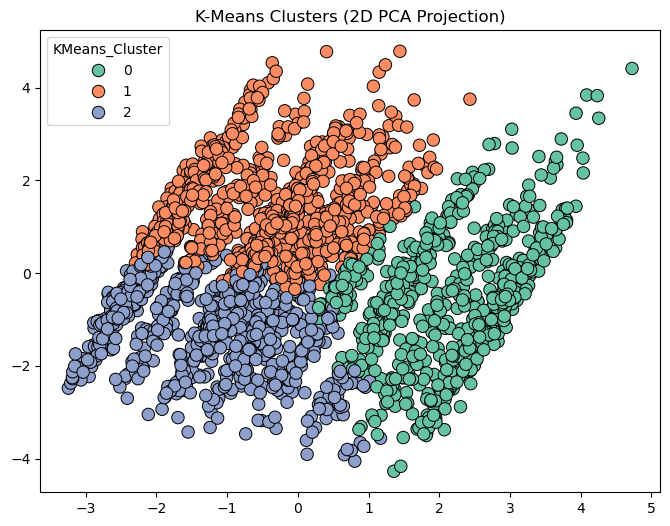

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['KMeans_Cluster'],
 palette="Set2", s=80, edgecolor="k")
plt.title("K-Means Clusters (2D PCA Projection)")
plt.show()

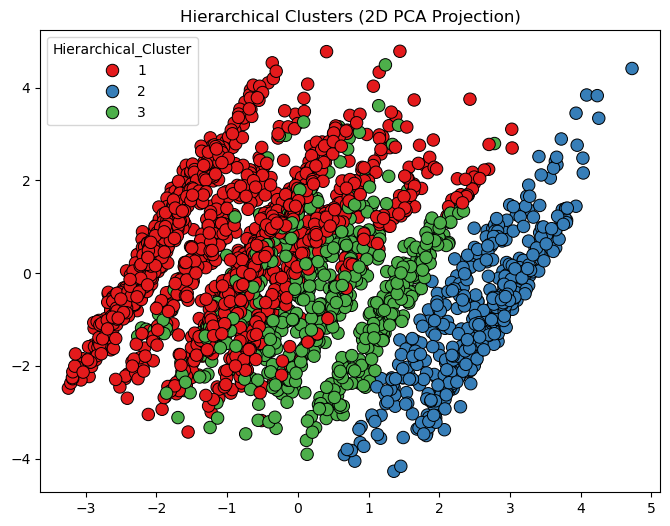

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Hierarchical_Cluster'],
 palette="Set1", s=80, edgecolor="k")
plt.title("Hierarchical Clusters (2D PCA Projection)")
plt.show()
